<a href="https://colab.research.google.com/github/hmarichal93/ICPRS2025-XAI-Rsalas/blob/main/ICPRS2025_Workshop_1_Multilayer_Perceptron_with_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 1 - MLP para Regresión para Regresión

Profesor: Dr. Ing. Rodrigo Salas, Universidad de Valparaíso

[rodrigo.salas@uv.cl](mailto:rodrigo.salas@uv.cl)

**ICPRS2025 - IEEE 15th International Conference on Pattern Recognition Systems**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [2]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

### Gráfica de la Función

Se desea aproximar la siguiente función nolineal $y=f(x_1,x_2) + \varepsilon$ utilizando el perceptrón multicapa.

$$ y = 3\cdot \exp\left(-\frac{x_1}{x_2}\right)\cdot \cos \left(\frac{(x_1-x_2)^2}{1000}\right) - 2\cdot \exp\left(-\frac{x_1-x_2+100}{100}\right)\cdot \sin \left(\frac{x_1}{x_2}\right) + \varepsilon$$

donde $\varepsilon \sim \cal{N}(0,\sigma_\varepsilon^2)$

Generación de los datos en una grilla discreta en el rango $[0,100]\times [50,120]$. Se considera un ruido gaussiano i.i.d para el término $\varepsilon$ con media $0$ y desviación estándar $\varepsilon=0.5$.

In [3]:
X1 = np.arange(0, 100, 1)
X2 = np.arange(50, 120, 1)
X1, X2 = np.meshgrid(X1, X2)
e = np.random.normal(0,0.5,(70,100))
Y = 3*np.exp(-(X1/X2))*np.cos((X1-X2)**2/1000)  - 2*np.exp(-(X1-X2+100)/100)*np.sin(X1/X2)+e

Se grafica la función como una superficie 3D

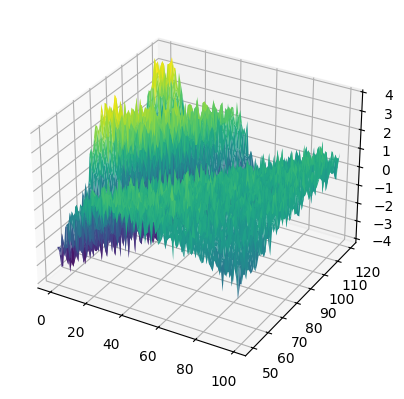

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax=fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=cm.viridis)

### Generación de datos Sintéticos

Se generan 10000 datos sintéticos con distribución uniforme para $x_1$ y $x_2$ en los rangos $[0,100]$ y $[50,120]$, respectivamente.

In [5]:
x1 = np.random.uniform(0,100,10000)
x2 = np.random.uniform(50,120,10000)
e = np.random.normal(0,0.5,10000)
y = 3*np.exp(-(x1/x2))*np.cos((x1-x2)**2/1000) - 2*np.exp(-(x1-x2+100)/100)*np.sin(x1/x2)+e

Se unen las componentes $x_1$ y $x_2$ en una matriz $X$ de dimensión $n\times 2$, donde las filas corresponden a las muestras, y las columnas a las variables (features).

In [6]:
X = np.vstack((x1,x2)).T
X

array([[ 75.41832181,  58.06940612],
       [ 72.20551014, 117.67439736],
       [ 35.19152301,  55.86604672],
       ...,
       [ 69.5986856 ,  56.16107611],
       [ 48.6871132 ,  54.06293013],
       [ 21.71696822,  93.53303986]])

### Preprocesamiento de los datos

Se procede a realizar un re-escalamiento de los Datos utilizando la función *MinMaxScaler*, el cual escala cada columna al rango $[0,1]$:

$$z_i^{(j)} = \frac{x_i^{(j)}-\min\{x^{(j)}\}}{\max\{x^{(j)}\}-\min\{x^{(j)}\}}$$

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
Z = scaler.fit_transform(X)

### Separación en conjunto de Entrenamiento y Test

El conjunto de datos se separa en un conjunto de entrenamiento utilizado para ajustar el modelo de Red Neuronal Artificial, y otro de Test y utilizado para evaluar la capacidad de generalización.

En este caso utilizaremos el $70\%$ de los datos para entrenamiento y el $30\%% para test.

In [8]:
Z_train, Z_test, y_train, y_test = train_test_split(Z,y,test_size=0.3)

### Creación del Perceptrón Multicapa

Se creará un modelo de Perceptron multicapa que consiste en:
- Una capa de entrada con 2 unidades
- Una capa escondidad con 100 unidades y función de activación sigmoidea o también conocidad como logística.
- Una capa escondidad con 20 unidades y función de activación sigmoidea o también conocidad como logística.
- Una capa de salida con 1 neurona con función de activación lineal

El total de parámetros a ajustar es de 2341.

La función de pérdida que se utilizará para entrenar es el *Error Cuadrático Medio*:

$$\mathcal{L}(y,\hat{y})= \sum_{i=1}^n (y_i-\hat{y_i})^2$$

El algoritmo de entrenamiento de tipo backpropagation que se utilizará es el *ADAM*



In [9]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='adam', metrics=['mean_squared_error'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,341 (9.14 KB)

 Trainable params: 2,341 (9.14 KB)

 Non-trainable params: 0 (0.00 B)

### Ajuste de la Red Neuronal Artificial

Con el fin de evitar el fenómeno del sobreajuster de la Red Neuronal Artificial, aplicaremos parada temprana con el criterio de si no se mejora el desempeño en 5 epocas, entonces se detiene el proceso

In [11]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

Además se almacenará en un archivo el mejor modelo encontrado durante el entrenamiento.

In [12]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Utilizamos la función *fit()* para entrenar el modelo. Se consideran un máximo de 1000 épocas con batch de tamaño 20. Además el conjunto de entrenamiento se divide en conjunto de ajuste($70%$) y validación ($30%$).

In [ ]:
history = model.fit(Z_train, y_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es,mc])

Epoch 1/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4285 - mean_squared_error: 3.4285
Epoch 1: val_loss improved from inf to 1.82551, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.4011 - mean_squared_error: 3.4011 - val_loss: 1.8255 - val_mean_squared_error: 1.8255
Epoch 2/1000
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8987 - mean_squared_error: 1.8987
Epoch 2: val_loss improved from 1.82551 to 1.80879, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8986 - mean_squared_error: 1.8986 - val_loss: 1.8088 - val_mean_squared_error: 1.8088
Epoch 3/1000
231/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8245 - mean_squared_error: 1.8245
Epoch 3: val_loss improved from 1.80879 to 1.79989, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8272 - mean_squared_error: 1.8272 - val_loss: 1.7999 - val_mean_squared_error: 1.7999
Epoch 4/1000
233/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8651 - mean_squared_error: 1.8651
Epoch 4: val_loss improved from 1.79989 to 1.76875, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8646 - mean_squared_error: 1.8646 - val_loss: 1.7688 - val_mean_squared_error: 1.7688
Epoch 5/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8812 - mean_squared_error: 1.8812
Epoch 5: val_loss improved from 1.76875 to 1.74471, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8777 - mean_squared_error: 1.8777 - val_loss: 1.7447 - val_mean_squared_error: 1.7447
Epoch 6/1000
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8590 - mean_squared_error: 1.8590
Epoch 6: val_loss improved from 1.74471 to 1.72224, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8586 - mean_squared_error: 1.8586 - val_loss: 1.7222 - val_mean_squared_error: 1.7222
Epoch 7/1000
236/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8037 - mean_squared_error: 1.8037
Epoch 7: val_loss improved from 1.72224 to 1.70341, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8027 - mean_squared_error: 1.8027 - val_loss: 1.7034 - val_mean_squared_error: 1.7034
Epoch 8/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7696 - mean_squared_error: 1.7696
Epoch 8: val_loss improved from 1.70341 to 1.69570, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7694 - mean_squared_error: 1.7694 - val_loss: 1.6957 - val_mean_squared_error: 1.6957
Epoch 9/1000
224/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7135 - mean_squared_error: 1.7135
Epoch 9: val_loss improved from 1.69570 to 1.69012, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7172 - mean_squared_error: 1.7172 - val_loss: 1.6901 - val_mean_squared_error: 1.6901
Epoch 10/1000
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7490 - mean_squared_error: 1.7490
Epoch 10: val_loss did not improve from 1.69012
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7491 - mean_squared_error: 1.7491 - val_loss: 1.6976 - val_mean_squared_error: 1.6976
Epoch 11/1000
237/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7049 - mean_squared_error: 1.7049
Epoch 11: val_loss improved from 1.69012 to 1.68802, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7067 - mean_squared_error: 1.7067 - val_loss: 1.6880 - val_mean_squared_error: 1.6880
Epoch 12/1000
226/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7014 - mean_squared_error: 1.7014
Epoch 12: val_loss improved from 1.68802 to 1.68785, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7054 - mean_squared_error: 1.7054 - val_loss: 1.6879 - val_mean_squared_error: 1.6879
Epoch 13/1000
219/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7304 - mean_squared_error: 1.7304
Epoch 13: val_loss improved from 1.68785 to 1.68761, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7325 - mean_squared_error: 1.7325 - val_loss: 1.6876 - val_mean_squared_error: 1.6876
Epoch 14/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7934 - mean_squared_error: 1.7934

Se recupera el mejor modelo obtenido durante el proceso de entrenamiento



In [ ]:
modelo = load_model('best_model.h5')

Graficamos la curva de aprendizaje

In [ ]:
train_loss = history.history['loss']               # Pérdida de entrenamiento
val_loss = history.history['val_loss']             # Pérdida de validación

plt.plot(train_loss, label='Entrenamiento')
plt.plot(val_loss, label='Validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

### Predicción de la Red Neuronal Artificial y Evaluación del Desempeño

Procedemos a obtener la predicción para el conjunto de entrenamiento para evaluar si logró aprender el conjunto de datos.

In [ ]:
y_predict = modelo.predict(Z_train)

Se grafica la predicción $\hat{y}$ vs el target $y$

In [ ]:
plt.plot(y_predict,y_train,'.')
plt.title('Predicción en el conjunto de Entrenamiento')
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
print('MSE:', mean_squared_error(y_train, y_predict))
print('R2:', r2_score(y_train, y_predict))

Procedemos a evaluar la capidad de generalización del modelo utilizando el conjunto de Test.

In [ ]:
y_predict_test = modelo.predict(Z_test)

In [ ]:
print('MSE:', mean_squared_error(y_test, y_predict_test))
print('R2:', r2_score(y_test, y_predict_test))

In [ ]:
plt.plot(y_predict_test,y_test,'.')
plt.title('Predicción en el conjunto de Test')
plt.xlabel('x1')
plt.ylabel('x2')

### Gráfica de la Predicción de la Red Neuronal Artificial

Graficaremos la predicción de la red neuronal artificial en una superficie 3D

In [ ]:
X1 = np.arange(0, 100, 1)
X2 = np.arange(50, 120, 1)
X1, X2 = np.meshgrid(X1, X2)
Y=np.zeros_like(X1).astype(float)
k=0
for (z1,z2) in zip(X1,X2):
    x = scaler.transform(np.vstack((z1,z2)).T)
    Y[k,:] =  modelo.predict(x).T
    k=k+1
fig = plt.figure()
ax = Axes3D(fig)
ax=fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=cm.viridis)

**Muchas Gracias**